## MASTER DATA SCIENCE: NUCLIO
## PROFESOR: JOSEPH GALLART
## PROJECT TRENMAX

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importamos librería
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px

In [3]:
#leemos el fichero de renfe
df_renfe=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project TrenMax/dataset/renfe.csv",sep=";")
df_renfe.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75


In [ ]:
#PREGUNTA 1

In [4]:
df_renfe.isnull().sum()

FECHA_CONSULTA        0
FECHA_INICIO          0
FECHA_FIN             0
CIUDAD_ORIGEN         0
CIUDAD_DESTINO        0
TIPO_TREN             0
TIPO_TARIFA        1343
CLASE              1343
PRECIO            28530
dtype: int64

In [ ]:
#PREGUNTA 2

In [5]:
for i in ["FECHA_CONSULTA","FECHA_INICIO","FECHA_FIN"]:
    df_renfe[i]=pd.to_datetime(df_renfe[i])

In [6]:
df_renfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA_CONSULTA  383568 non-null  datetime64[ns]
 1   FECHA_INICIO    383568 non-null  datetime64[ns]
 2   FECHA_FIN       383568 non-null  datetime64[ns]
 3   CIUDAD_ORIGEN   383568 non-null  object        
 4   CIUDAD_DESTINO  383568 non-null  object        
 5   TIPO_TREN       383568 non-null  object        
 6   TIPO_TARIFA     382225 non-null  object        
 7   CLASE           382225 non-null  object        
 8   PRECIO          355038 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 26.3+ MB


In [ ]:
#PREGUNTA 3

In [7]:
df_renfe[df_renfe.duplicated()].shape

(33, 9)

In [8]:
df_renfe_sin_duplicados=df_renfe.drop_duplicates().copy(deep=True)

In [9]:
df_renfe_sin_duplicados.reset_index(drop=True, inplace=True)

In [10]:
#PREGUNTA 4

In [11]:
df_renfe_sin_duplicados["TIEMPO_VIAJE"]=(df_renfe_sin_duplicados["FECHA_FIN"]-df_renfe_sin_duplicados["FECHA_INICIO"])/np.timedelta64(1,'m')

In [12]:
df_renfe_sin_duplicados["DIF_INI_BUS"]=(df_renfe_sin_duplicados["FECHA_INICIO"]-df_renfe_sin_duplicados["FECHA_CONSULTA"])/np.timedelta64(1,'m')

In [13]:
#PREGUNTA 5

In [14]:
for col in ['FECHA_CONSULTA', 'FECHA_INICIO', 'FECHA_FIN']:
    df_renfe_sin_duplicados[col + '_HORA'] = df_renfe_sin_duplicados[col].dt.hour
    df_renfe_sin_duplicados[col + '_NOMBREDIA'] = df_renfe_sin_duplicados[col].dt.day_name()
    ##O .dt.weekday_name
    df_renfe_sin_duplicados[col + '_DIA'] = df_renfe_sin_duplicados[col].dt.day
    df_renfe_sin_duplicados[col + '_MES'] = df_renfe_sin_duplicados[col].dt.month
        

df_renfe_sin_duplicados.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,...,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,...,25,5,20,Friday,28,6,23,Friday,28,6
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,...,22,6,10,Sunday,14,7,13,Sunday,14,7
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,...,17,4,13,Thursday,23,5,16,Thursday,23,5
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,...,10,5,14,Wednesday,29,5,22,Wednesday,29,5
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,...,9,5,13,Wednesday,26,6,16,Wednesday,26,6


In [15]:
#PREGUNTA 6

In [16]:
(df_renfe_sin_duplicados["PRECIO"].isnull().sum()/df_renfe_sin_duplicados.shape[0])*100

7.43478430912433

In [17]:
#PREGUNTA 7

In [18]:
df_renfe_sin_duplicados.isnull().sum()

FECHA_CONSULTA                  0
FECHA_INICIO                    0
FECHA_FIN                       0
CIUDAD_ORIGEN                   0
CIUDAD_DESTINO                  0
TIPO_TREN                       0
TIPO_TARIFA                  1338
CLASE                        1338
PRECIO                      28515
TIEMPO_VIAJE                    0
DIF_INI_BUS                     0
FECHA_CONSULTA_HORA             0
FECHA_CONSULTA_NOMBREDIA        0
FECHA_CONSULTA_DIA              0
FECHA_CONSULTA_MES              0
FECHA_INICIO_HORA               0
FECHA_INICIO_NOMBREDIA          0
FECHA_INICIO_DIA                0
FECHA_INICIO_MES                0
FECHA_FIN_HORA                  0
FECHA_FIN_NOMBREDIA             0
FECHA_FIN_DIA                   0
FECHA_FIN_MES                   0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51c54f7990>]],
      dtype=object)

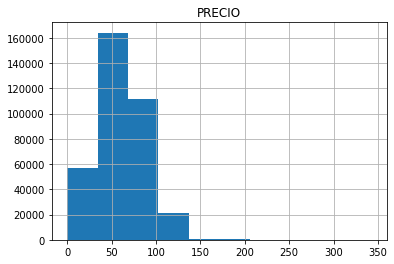

In [19]:
df_renfe_sin_duplicados.hist("PRECIO")

In [20]:
df_renfe_sin_duplicados[df_renfe_sin_duplicados["PRECIO"]<=0]

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,...,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
121955,2019-06-17 09:01:21,2019-08-03 20:00:00,2019-08-03 23:10:00,BARCELONA,MADRID,AVE,4x100,Turista,0.0,190.0,...,17,6,20,Saturday,3,8,23,Saturday,3,8
136919,2019-06-13 01:13:29,2019-06-16 12:50:00,2019-06-16 15:45:00,BARCELONA,MADRID,AVE-TGV,Flexible,Preferente,0.0,175.0,...,13,6,12,Sunday,16,6,15,Sunday,16,6


In [21]:
df_renfe_sin_duplicados.drop(df_renfe_sin_duplicados[df_renfe_sin_duplicados["PRECIO"]<=0].index,axis=0, inplace=True)

In [22]:
df_renfe_sin_duplicados["CLASE"].fillna(df_renfe_sin_duplicados["CLASE"].mode()[0], inplace=True)

In [23]:
df_renfe_sin_duplicados["TIPO_TARIFA"].fillna(df_renfe_sin_duplicados["TIPO_TARIFA"].mode()[0], inplace=True)

In [24]:
df_renfe_sin_duplicados.dropna(subset=["PRECIO"], inplace=True)

In [25]:
df_renfe_sin_duplicados.shape

(355018, 23)

In [26]:
df_renfe.shape

(383568, 9)

In [ ]:
#PREGUNTA 8

In [28]:
df_renfe_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355018 entries, 0 to 383534
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   FECHA_CONSULTA            355018 non-null  datetime64[ns]
 1   FECHA_INICIO              355018 non-null  datetime64[ns]
 2   FECHA_FIN                 355018 non-null  datetime64[ns]
 3   CIUDAD_ORIGEN             355018 non-null  object        
 4   CIUDAD_DESTINO            355018 non-null  object        
 5   TIPO_TREN                 355018 non-null  object        
 6   TIPO_TARIFA               355018 non-null  object        
 7   CLASE                     355018 non-null  object        
 8   PRECIO                    355018 non-null  float64       
 9   TIEMPO_VIAJE              355018 non-null  float64       
 10  DIF_INI_BUS               355018 non-null  float64       
 11  FECHA_CONSULTA_HORA       355018 non-null  int64         
 12  FE

CIUDAD_ORIGEN 
 MADRID        176790
BARCELONA      59807
SEVILLA        53652
VALENCIA       52033
PONFERRADA     12736
Name: CIUDAD_ORIGEN, dtype: int64 

CIUDAD_DESTINO 
 MADRID        178228
BARCELONA      60686
VALENCIA       54666
SEVILLA        53050
PONFERRADA      8388
Name: CIUDAD_DESTINO, dtype: int64 

TIPO_TREN 
 AVE          251958
ALVIA         21130
REGIONAL      18409
INTERCITY     18238
AV City       10247
MD-LD          7520
AVE-TGV        4915
R. EXPRES      4603
TRENHOTEL      4202
LD             4064
AVE-LD         3159
LD-MD          2601
AVE-MD         2579
MD-AVE          846
MD              547
Name: TIPO_TREN, dtype: int64 

TIPO_TARIFA 
 Promo                      251084
Flexible                    72193
Adulto ida                  23012
Promo +                      8542
COD.PROMOCIONAL               163
Individual-Flexible            13
Mesa                            7
Doble Familiar-Flexible         3
Grupos Ida                      1
Name: TIPO_TARIFA, d

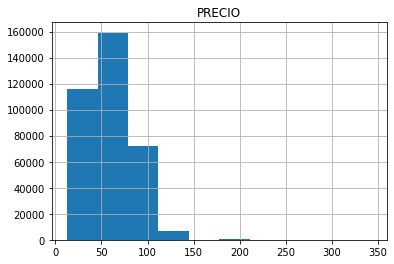

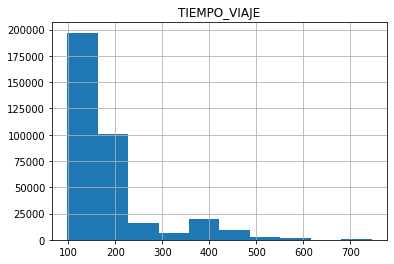

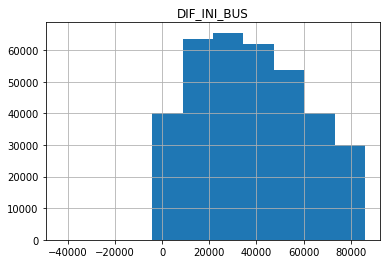

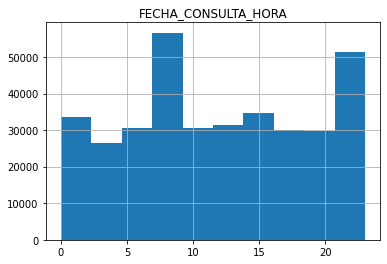

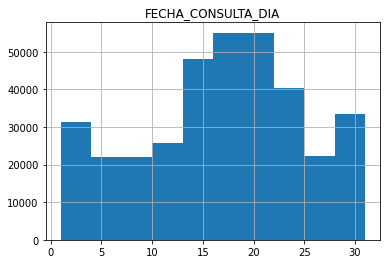

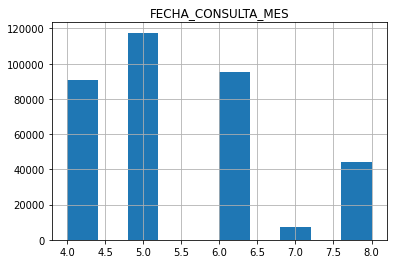

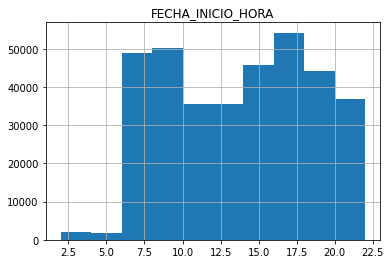

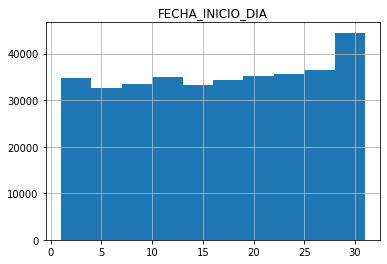

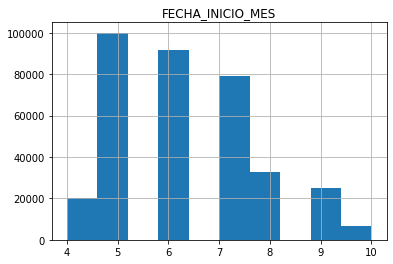

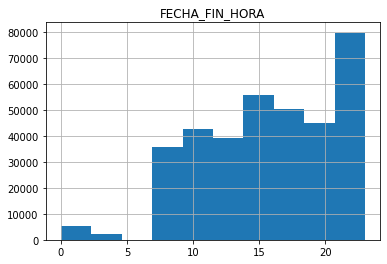

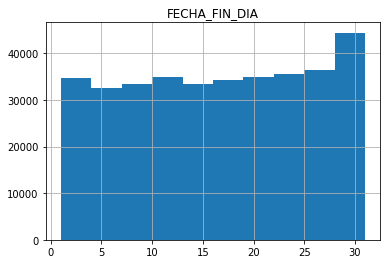

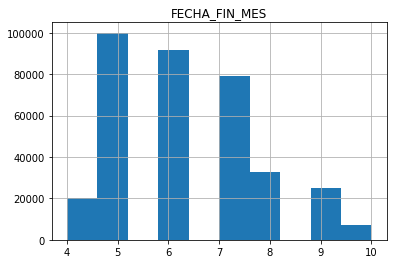

In [29]:
for i in df_renfe_sin_duplicados:
  if df_renfe_sin_duplicados[i].dtype.kind == "O":
    print(i,'\n', df_renfe_sin_duplicados[i].value_counts(), '\n')
  elif (df_renfe_sin_duplicados[i].dtype.kind=="f") or (df_renfe_sin_duplicados[i].dtype.kind=="i"):
    print(df_renfe_sin_duplicados.hist(i))
  

In [30]:
#la función hace lo siguiente, crea una lista vacía, hace un conteo de los valores del dataset, se hace un reset index para que se vuelva un dataset
#luego se recorre el data set y se pregunta si el nuevo dataset que tiene los conteos de los valores es menor al umbral, en caso sea así se agrega en una lista
def obten_lista_eliminar(dataset, columna, umbral):
  lista_borrar= []  
  tabla=dataset[columna].value_counts().reset_index()
  print(tabla)
  for i in range(0,len(tabla)):
    if (tabla.iloc[i][columna]) < umbral:
      lista_borrar.append(tabla.iloc[i]["index"])
  return lista_borrar

In [31]:
lista_eliminar_tarifa = obten_lista_eliminar(df_renfe_sin_duplicados, "TIPO_TARIFA", 400)

                     index  TIPO_TARIFA
0                    Promo       251084
1                 Flexible        72193
2               Adulto ida        23012
3                  Promo +         8542
4          COD.PROMOCIONAL          163
5      Individual-Flexible           13
6                     Mesa            7
7  Doble Familiar-Flexible            3
8               Grupos Ida            1


In [32]:
def eliminar_lista_df(dataset, columna, lista_eliminar):
  dataset.drop(dataset[dataset[columna].isin(lista_eliminar)].index, inplace=True)


In [33]:
df_renfe_sin_duplicados2=df_renfe_sin_duplicados.copy()

In [34]:
eliminar_lista_df(df_renfe_sin_duplicados2,"TIPO_TARIFA",lista_eliminar_tarifa)

In [35]:
df_renfe_sin_duplicados.shape

(355018, 23)

In [36]:
df_renfe_sin_duplicados2.shape

(354831, 23)

In [37]:
lista_eliminar_clase = obten_lista_eliminar(df_renfe_sin_duplicados2, "CLASE", 400)

                      index   CLASE
0                   Turista  270751
1                Preferente   34160
2              Turista Plus   25916
3        Turista con enlace   21316
4       TuristaSólo plaza H    2145
5    PreferenteSólo plaza H     282
6              Cama Turista     259
7  Turista PlusSólo plaza H       2


In [38]:
eliminar_lista_df(df_renfe_sin_duplicados2,"CLASE",lista_eliminar_clase)

In [39]:
df_renfe_sin_duplicados2.shape

(354288, 23)

In [40]:
df_renfe_sin_duplicados2[df_renfe_sin_duplicados2["DIF_INI_BUS"]<0]

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,...,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
956,2019-05-28 01:11:40,2019-05-27 20:35:00,2019-05-27 23:15:00,MADRID,SEVILLA,AVE,Promo,Turista Plus,72.30,160.0,...,28,5,20,Monday,27,5,23,Monday,27,5
1372,2019-06-11 01:11:48,2019-06-10 13:10:00,2019-06-10 20:51:00,MADRID,SEVILLA,MD-LD,Flexible,Turista con enlace,45.80,461.0,...,11,6,13,Monday,10,6,20,Monday,10,6
1463,2019-05-24 01:22:41,2019-05-23 09:50:00,2019-05-23 12:36:00,SEVILLA,MADRID,ALVIA,Flexible,Preferente,87.40,166.0,...,24,5,9,Thursday,23,5,12,Thursday,23,5
1944,2019-05-02 01:40:07,2019-05-01 14:10:00,2019-05-01 16:03:00,MADRID,VALENCIA,AVE,Promo,Turista,51.15,113.0,...,2,5,14,Wednesday,1,5,16,Wednesday,1,5
3504,2019-05-29 01:29:10,2019-05-28 07:30:00,2019-05-28 09:51:00,MADRID,SEVILLA,AVE,Flexible,Turista,76.30,141.0,...,29,5,7,Tuesday,28,5,9,Tuesday,28,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378258,2019-05-17 01:13:31,2019-05-16 16:45:00,2019-05-16 19:17:00,SEVILLA,MADRID,AVE,Flexible,Turista,76.30,152.0,...,17,5,16,Thursday,16,5,19,Thursday,16,5
380888,2019-06-05 19:51:54,2019-06-05 11:28:00,2019-06-05 16:00:00,PONFERRADA,MADRID,LD,Flexible,Turista con enlace,57.00,272.0,...,5,6,11,Wednesday,5,6,16,Wednesday,5,6
381071,2019-04-27 01:26:16,2019-04-26 18:45:00,2019-04-26 21:17:00,SEVILLA,MADRID,AVE,Flexible,Turista,76.30,152.0,...,27,4,18,Friday,26,4,21,Friday,26,4
381370,2019-06-20 01:25:05,2019-06-19 19:19:00,2019-06-19 21:59:00,SEVILLA,MADRID,INTERCITY,Flexible,Turista,62.20,160.0,...,20,6,19,Wednesday,19,6,21,Wednesday,19,6


In [41]:
df_renfe_sin_duplicados2.drop(df_renfe_sin_duplicados2[df_renfe_sin_duplicados2["DIF_INI_BUS"]<0].index,axis=0, inplace=True) 

In [42]:
df_renfe_sin_duplicados2.shape

(353779, 23)

In [43]:
for i in ("FECHA_CONSULTA_HORA", "FECHA_CONSULTA_NOMBREDIA", "FECHA_CONSULTA_DIA", "FECHA_CONSULTA_MES"):
  del(df_renfe_sin_duplicados2[i])

In [ ]:
#PREGUNTA 9

In [ ]:
#A. ¿Cuál es la fecha mínima y máxima de consulta de las simulaciones?


In [44]:
min(df_renfe_sin_duplicados2["FECHA_CONSULTA"])

Timestamp('2019-04-11 21:49:46')

In [45]:
max(df_renfe_sin_duplicados2["FECHA_CONSULTA"])

Timestamp('2019-08-22 19:06:26')

In [ ]:
#B. ¿Cuál es el precio mímino, máximo y medio del billete?

In [46]:
min(df_renfe_sin_duplicados2["PRECIO"])

12.85

In [47]:
max(df_renfe_sin_duplicados2["PRECIO"])

214.2

In [48]:
df_renfe_sin_duplicados2["PRECIO"].mean()

61.37607551607078

In [49]:
#C. ¿Cuántas rutas se simularon en el mes de agosto de 2019?

In [50]:
len(df_renfe_sin_duplicados2[(df_renfe_sin_duplicados2["FECHA_CONSULTA"].dt.month ==8) & (df_renfe_sin_duplicados2["FECHA_CONSULTA"].dt.year ==2019)])

44166

In [51]:
#D. ¿Cuántas rutas se simularon que la duración del viaje sea superior a 4 horas?

In [52]:
len(df_renfe_sin_duplicados2[df_renfe_sin_duplicados2["TIEMPO_VIAJE"]> 240])

55239

In [53]:
#E. ¿Puedes decir cuál es la ciudad que menos simulaciones se han hecho como origen y cuántas simulaciones fueron?

In [54]:
df_renfe_sin_duplicados2["CIUDAD_ORIGEN"].value_counts()

MADRID        176084
BARCELONA      59656
SEVILLA        53409
VALENCIA       51945
PONFERRADA     12685
Name: CIUDAD_ORIGEN, dtype: int64

In [55]:
#F. Calcular la clase más barata y la clase más cara

In [56]:
df_renfe_sin_duplicados2.groupby('CLASE')["PRECIO"].agg(['min', 'max','mean']).reset_index().sort_values(by=["mean"])

,CLASE,min,max,mean
3,Turista con enlace,17.10,76.4,43.787379
1,Turista,12.85,127.1,58.505623
0,Preferente,27.70,214.2,76.404759
2,Turista Plus,15.45,152.5,83.868315
4,TuristaSólo plaza H,27.90,127.1,88.469211


In [57]:
#G. Calcular la tarifa más cara en el mes de viaje en septiembre de 2019

In [59]:
df_renfe_sin_duplicados2[(df_renfe_sin_duplicados2["FECHA_INICIO_MES"]==9) & (df_renfe_sin_duplicados2["FECHA_INICIO"].dt.year==2019)] \
.groupby('TIPO_TARIFA')["PRECIO"].agg(['max','mean']).reset_index().sort_values(by=["mean"]).reset_index(drop=True)

,TIPO_TARIFA,max,mean
0,Adulto ida,43.25,30.736767
1,Promo +,44.70,35.903693
2,Promo,120.50,53.332927
3,Flexible,129.30,71.410736


In [60]:
#H. ¿En promedio cuál es el tipo de tren más barato y de cuánto?

In [61]:
df_renfe_sin_duplicados2.groupby('TIPO_TREN')["PRECIO"].mean().reset_index().sort_values(by=["PRECIO"])

,TIPO_TREN,PRECIO
13,REGIONAL,28.350000
8,LD-MD,38.066673
11,MD-LD,38.695626
6,INTERCITY,39.001475
12,R. EXPRES,43.250000
10,MD-AVE,44.040629
3,AVE-LD,44.632616
14,TRENHOTEL,45.800000
7,LD,46.635315
1,AV City,47.271258


In [62]:
#I. ¿Cuántas rutas se simularon entre origen MADRID y destino BARCELONA?

In [63]:
len(df_renfe_sin_duplicados2[(df_renfe_sin_duplicados2["CIUDAD_ORIGEN"]=="MADRID") &  (df_renfe_sin_duplicados2["CIUDAD_DESTINO"]=="BARCELONA")])

60551

In [64]:
#J. En promedio ¿Cuál es el mes más barato para viajar desde BARCELONA a MADRID en AVE y de cuánto?

In [65]:
df_renfe_sin_duplicados2[(df_renfe_sin_duplicados2["CIUDAD_ORIGEN"]=="BARCELONA") &  (df_renfe_sin_duplicados2["CIUDAD_DESTINO"]=="MADRID")] \
.groupby('FECHA_INICIO_MES')["PRECIO"].agg(['mean']).reset_index().sort_values(by=["mean"])

,FECHA_INICIO_MES,mean
6,10,55.874713
4,8,75.715161
5,9,78.262331
3,7,85.238577
1,5,86.568754
2,6,88.473235
0,4,92.021817


In [66]:
#K. Calcular el precio medio del billete teniendo como ciudad origen MADRID, destino VALENCIA para el mes de viaje AGOSTO

In [67]:
df_renfe_sin_duplicados2[  (df_renfe_sin_duplicados2["CIUDAD_ORIGEN"]=="MADRID") \
                        & (df_renfe_sin_duplicados2["CIUDAD_DESTINO"]=="VALENCIA") \
                        & (df_renfe_sin_duplicados2["FECHA_INICIO_MES"]==8)                 ] \
.groupby('FECHA_INICIO_MES')["PRECIO"].agg(['mean']).reset_index().sort_values(by=["mean"])

,FECHA_INICIO_MES,mean
0,8,37.864493


In [ ]:
#PREGUNTA 10

In [68]:
df_renfe_clean= df_renfe_sin_duplicados2.copy()
latitud_longitud=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project TrenMax/ETL/LAT_LONG_CIUDADES.CSV", sep=";")
latitud_longitud

,PROVINCIA,LATITUD,LONGITUD
0,MADRID,40.416705,-3.703582
1,BARCELONA,41.382894,2.177432
2,SEVILLA,37.388630,-5.995340
3,VALENCIA,39.469901,-0.375951
4,PONFERRADA,42.545412,-6.593872


In [69]:
df_renfe_clean_1=pd.merge(df_renfe_clean,latitud_longitud, how='left',left_on=["CIUDAD_ORIGEN"],right_on=["PROVINCIA"])
df_renfe_clean_1


df_renfe_clean_1.info()
df_renfe_clean_2=pd.merge(df_renfe_clean_1,latitud_longitud, how='left', \
        suffixes=('_ORIGEN', '_DESTINO'), left_on=["CIUDAD_DESTINO"],right_on=["PROVINCIA"])


df_renfe_clean_2
df_renfe_clean_2.drop(["PROVINCIA_DESTINO","PROVINCIA_ORIGEN"],axis=1,inplace=True)

df_renfe_clean_2.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353779 entries, 0 to 353778
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   FECHA_CONSULTA          353779 non-null  datetime64[ns]
 1   FECHA_INICIO            353779 non-null  datetime64[ns]
 2   FECHA_FIN               353779 non-null  datetime64[ns]
 3   CIUDAD_ORIGEN           353779 non-null  object        
 4   CIUDAD_DESTINO          353779 non-null  object        
 5   TIPO_TREN               353779 non-null  object        
 6   TIPO_TARIFA             353779 non-null  object        
 7   CLASE                   353779 non-null  object        
 8   PRECIO                  353779 non-null  float64       
 9   TIEMPO_VIAJE            353779 non-null  float64       
 10  DIF_INI_BUS             353779 non-null  float64       
 11  FECHA_INICIO_HORA       353779 non-null  int64         
 12  FECHA_INICIO_NOMBREDIA  353779

(353779, 23)

In [70]:
mapa_datos = df_renfe_clean_2.groupby(['CIUDAD_DESTINO', 'LATITUD_DESTINO','LONGITUD_DESTINO'])["TIEMPO_VIAJE"].mean().reset_index()
mapa_global2 = folium.Map(location=[40.416705, -3.703582], tiles='cartodbpositron',
min_zoom=4, max_zoom=8, zoom_start=6)
for i in range(0, len(mapa_datos)): 
  folium.Circle(location=[mapa_datos.iloc[i]['LATITUD_DESTINO'], mapa_datos.iloc[i]['LONGITUD_DESTINO']],
  color='crimson',
  tooltip ='<li><bold>Ciudad : '+str(mapa_datos.iloc[i]['CIUDAD_DESTINO'])+
'<li><bold>Tiempo medio de viaje : '+str(mapa_datos.iloc[i]['TIEMPO_VIAJE']),
  radius=int(mapa_datos.iloc[i]['TIEMPO_VIAJE'])**2.0).add_to(mapa_global2) 
mapa_global2

In [ ]:
##########################################
###########PARTE 2########################
##########################################

In [ ]:
#PREGUNTA 1

In [71]:
#VAMOS A BORRAR LA LATITUD QUE NO AYUDARA EN LA PREDICCION
for i in ["LATITUD_ORIGEN","LATITUD_DESTINO","LONGITUD_ORIGEN","LONGITUD_DESTINO"]:
  del(df_renfe_clean_2[i])

In [72]:
corr = df_renfe_clean_2.corr()

In [73]:
corr.style.background_gradient(cmap='coolwarm')

,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_INICIO_HORA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_DIA,FECHA_FIN_MES
PRECIO,1.000000,-0.237650,-0.240747,0.049845,0.032612,-0.187549,-0.010873,0.032169,-0.187592
TIEMPO_VIAJE,-0.237650,1.000000,0.019551,-0.185115,-0.006986,0.000388,0.102022,-0.006622,0.000520
DIF_INI_BUS,-0.240747,0.019551,1.000000,0.005120,-0.030119,0.451424,0.007381,-0.030604,0.451538
FECHA_INICIO_HORA,0.049845,-0.185115,0.005120,1.000000,0.002874,-0.003331,0.720536,0.002988,-0.002562
FECHA_INICIO_DIA,0.032612,-0.006986,-0.030119,0.002874,1.000000,-0.294011,0.001746,0.996356,-0.293261
FECHA_INICIO_MES,-0.187549,0.000388,0.451424,-0.003331,-0.294011,1.000000,-0.004904,-0.293218,0.999836
FECHA_FIN_HORA,-0.010873,0.102022,0.007381,0.720536,0.001746,-0.004904,1.000000,0.001643,-0.006275
FECHA_FIN_DIA,0.032169,-0.006622,-0.030604,0.002988,0.996356,-0.293218,0.001643,1.000000,-0.293986
FECHA_FIN_MES,-0.187592,0.000520,0.451538,-0.002562,-0.293261,0.999836,-0.006275,-0.293986,1.000000


In [74]:
for i in ["FECHA_FIN_DIA","FECHA_FIN_MES"]:
  del(df_renfe_clean_2[i])

In [75]:
#PREGUNTA 2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51c4b9da50>]],
      dtype=object)

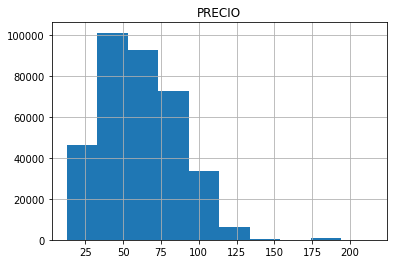

In [76]:
df_renfe_clean_2.hist("PRECIO")

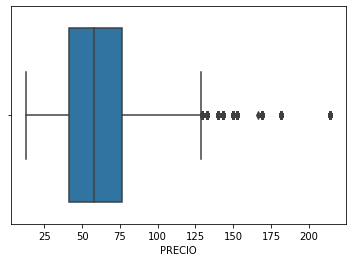

In [77]:
sns.boxplot(x=df_renfe_clean_2["PRECIO"])

In [78]:
df_renfe_clean_2["LOG_PRECIO"]=np.log10(df_renfe_clean_2["PRECIO"])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51c48dfb90>]],
      dtype=object)

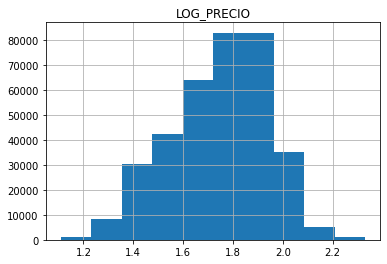

In [79]:
df_renfe_clean_2.hist("LOG_PRECIO")

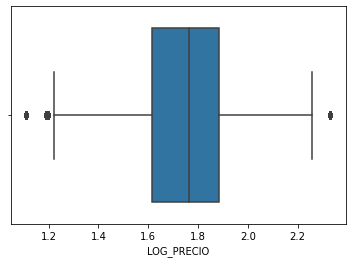

In [80]:
sns.boxplot(x=df_renfe_clean_2["LOG_PRECIO"])

In [81]:
df_renfe_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353779 entries, 0 to 353778
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   FECHA_CONSULTA          353779 non-null  datetime64[ns]
 1   FECHA_INICIO            353779 non-null  datetime64[ns]
 2   FECHA_FIN               353779 non-null  datetime64[ns]
 3   CIUDAD_ORIGEN           353779 non-null  object        
 4   CIUDAD_DESTINO          353779 non-null  object        
 5   TIPO_TREN               353779 non-null  object        
 6   TIPO_TARIFA             353779 non-null  object        
 7   CLASE                   353779 non-null  object        
 8   PRECIO                  353779 non-null  float64       
 9   TIEMPO_VIAJE            353779 non-null  float64       
 10  DIF_INI_BUS             353779 non-null  float64       
 11  FECHA_INICIO_HORA       353779 non-null  int64         
 12  FECHA_INICIO_NOMBREDIA  353779

In [82]:
#PREGUNTA 3

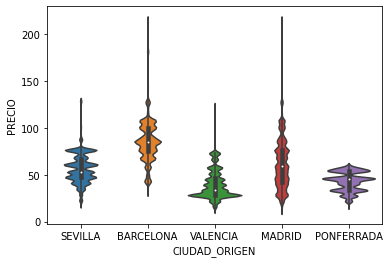

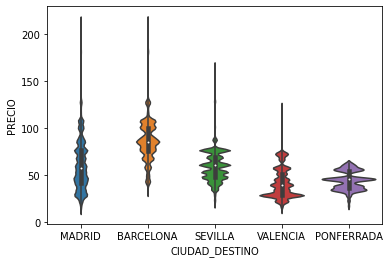

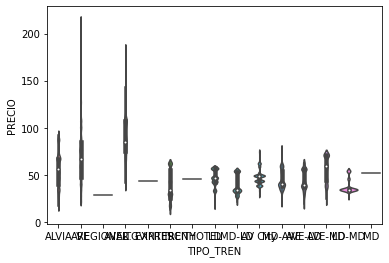

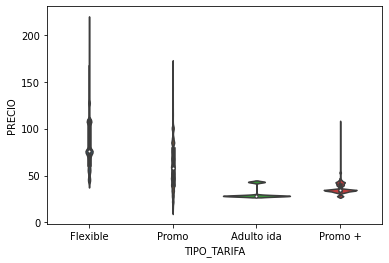

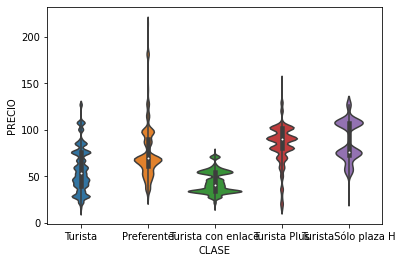

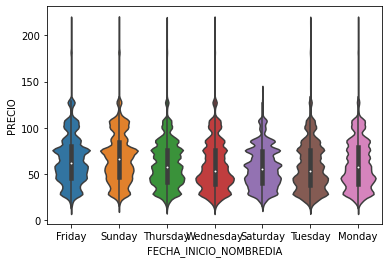

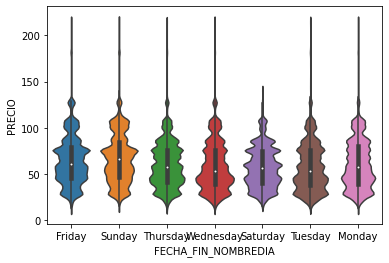

In [83]:
for i in df_renfe_clean_2:
  if (df_renfe_clean_2[i].dtype.kind =="O"):
    plt.figure()
    sns.violinplot(x=i,y="PRECIO", data=df_renfe_clean_2)    

In [84]:
#PREGUNTA 4

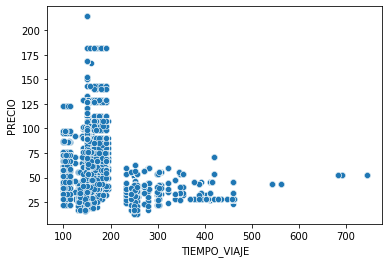

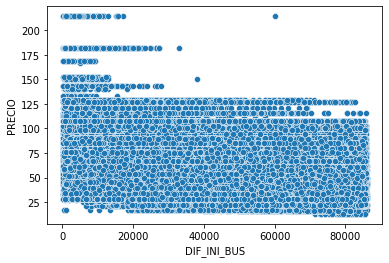

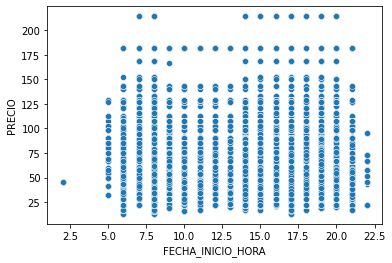

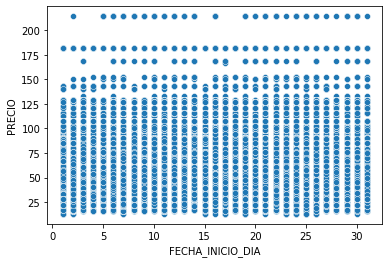

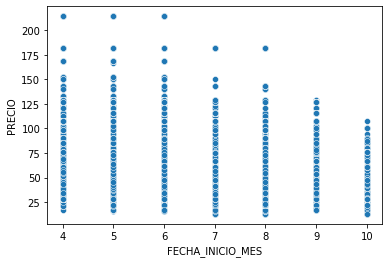

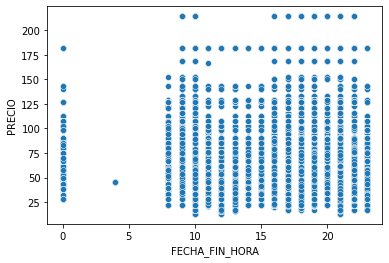

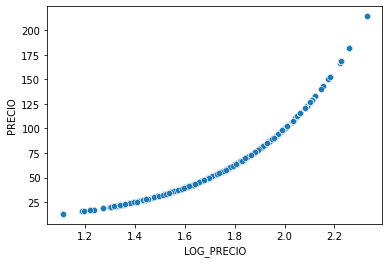

In [85]:
for i in df_renfe_clean_2:
  if (df_renfe_clean_2[i].dtype.kind in ("i","f")) and (i!="PRECIO"):
    plt.figure()
    sns.scatterplot(x=i,y="PRECIO", data=df_renfe_clean_2)    

In [86]:
#PREGUNTA 5

In [87]:
target= ["PRECIO","LOG_PRECIO"]

In [88]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind == "O")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [89]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df_renfe_clean_2)

In [90]:
lista_categoricas

['CIUDAD_ORIGEN',
 'CIUDAD_DESTINO',
 'TIPO_TREN',
 'TIPO_TARIFA',
 'CLASE',
 'FECHA_INICIO_NOMBREDIA',
 'FECHA_FIN_NOMBREDIA']

In [91]:
df_renfe_prep=pd.get_dummies(data=df_renfe_clean_2,                               
                               columns=lista_categoricas
                               )

In [92]:
pd.set_option('max_columns', None)

In [93]:
df_renfe_prep.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_INICIO_HORA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,LOG_PRECIO,CIUDAD_ORIGEN_BARCELONA,CIUDAD_ORIGEN_MADRID,CIUDAD_ORIGEN_PONFERRADA,CIUDAD_ORIGEN_SEVILLA,CIUDAD_ORIGEN_VALENCIA,CIUDAD_DESTINO_BARCELONA,CIUDAD_DESTINO_MADRID,CIUDAD_DESTINO_PONFERRADA,CIUDAD_DESTINO_SEVILLA,CIUDAD_DESTINO_VALENCIA,TIPO_TREN_ALVIA,TIPO_TREN_AV City,TIPO_TREN_AVE,TIPO_TREN_AVE-LD,TIPO_TREN_AVE-MD,TIPO_TREN_AVE-TGV,TIPO_TREN_INTERCITY,TIPO_TREN_LD,TIPO_TREN_LD-MD,TIPO_TREN_MD,TIPO_TREN_MD-AVE,TIPO_TREN_MD-LD,TIPO_TREN_R. EXPRES,TIPO_TREN_REGIONAL,TIPO_TREN_TRENHOTEL,TIPO_TARIFA_Adulto ida,TIPO_TARIFA_Flexible,TIPO_TARIFA_Promo,TIPO_TARIFA_Promo +,CLASE_Preferente,CLASE_Turista,CLASE_Turista Plus,CLASE_Turista con enlace,CLASE_TuristaSólo plaza H,FECHA_INICIO_NOMBREDIA_Friday,FECHA_INICIO_NOMBREDIA_Monday,FECHA_INICIO_NOMBREDIA_Saturday,FECHA_INICIO_NOMBREDIA_Sunday,FECHA_INICIO_NOMBREDIA_Thursday,FECHA_INICIO_NOMBREDIA_Tuesday,FECHA_INICIO_NOMBREDIA_Wednesday,FECHA_FIN_NOMBREDIA_Friday,FECHA_FIN_NOMBREDIA_Monday,FECHA_FIN_NOMBREDIA_Saturday,FECHA_FIN_NOMBREDIA_Sunday,FECHA_FIN_NOMBREDIA_Thursday,FECHA_FIN_NOMBREDIA_Tuesday,FECHA_FIN_NOMBREDIA_Wednesday
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,67.20,158.0,50092.950000,20,28,6,23,1.827369,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,107.70,190.0,31494.816667,10,14,7,13,2.032216,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,47.30,150.0,52275.950000,13,23,5,16,1.674861,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,28.35,460.0,26968.016667,14,29,5,22,1.452553,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,66.75,179.0,68741.383333,13,26,6,16,1.824451,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [94]:
pd.reset_option("max_columns")

In [95]:
#PREGUNTA 6

In [96]:
def minmaxTransformacion(variable_transformar):
    minMaxResultado=MinMaxScaler()
    df_renfe_prep[variable_transformar]=minMaxResultado.fit_transform(df_renfe_prep[variable_transformar].values.reshape(-1,1))
    return minMaxResultado

In [97]:
for i in lista_numericas:
  print(i)
  

TIEMPO_VIAJE
DIF_INI_BUS
FECHA_INICIO_HORA
FECHA_INICIO_DIA
FECHA_INICIO_MES
FECHA_FIN_HORA


In [98]:
for i in lista_numericas:
  globals()[f"minMax_{i}"] = minmaxTransformacion(i)

In [99]:
for i in ["FECHA_CONSULTA","FECHA_INICIO","FECHA_FIN"]:
  del(df_renfe_prep[i])

In [100]:
df_renfe_prep.head()

,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_INICIO_HORA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,LOG_PRECIO,CIUDAD_ORIGEN_BARCELONA,CIUDAD_ORIGEN_MADRID,...,FECHA_INICIO_NOMBREDIA_Thursday,FECHA_INICIO_NOMBREDIA_Tuesday,FECHA_INICIO_NOMBREDIA_Wednesday,FECHA_FIN_NOMBREDIA_Friday,FECHA_FIN_NOMBREDIA_Monday,FECHA_FIN_NOMBREDIA_Saturday,FECHA_FIN_NOMBREDIA_Sunday,FECHA_FIN_NOMBREDIA_Thursday,FECHA_FIN_NOMBREDIA_Tuesday,FECHA_FIN_NOMBREDIA_Wednesday
0,67.20,0.092736,0.581605,0.90,0.900000,0.333333,1.000000,1.827369,0,0,...,0,0,0,1,0,0,0,0,0,0
1,107.70,0.142195,0.365538,0.40,0.433333,0.500000,0.565217,2.032216,1,0,...,0,0,0,0,0,0,1,0,0,0
2,47.30,0.080371,0.606966,0.55,0.733333,0.166667,0.695652,1.674861,0,0,...,1,0,0,0,0,0,0,1,0,0
3,28.35,0.559505,0.312947,0.60,0.933333,0.166667,0.956522,1.452553,0,0,...,0,0,1,0,0,0,0,0,0,1
4,66.75,0.125193,0.798256,0.55,0.833333,0.333333,0.695652,1.824451,0,1,...,0,0,1,0,0,0,0,0,0,1


In [101]:
df_renfe_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353779 entries, 0 to 353778
Data columns (total 56 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   PRECIO                            353779 non-null  float64
 1   TIEMPO_VIAJE                      353779 non-null  float64
 2   DIF_INI_BUS                       353779 non-null  float64
 3   FECHA_INICIO_HORA                 353779 non-null  float64
 4   FECHA_INICIO_DIA                  353779 non-null  float64
 5   FECHA_INICIO_MES                  353779 non-null  float64
 6   FECHA_FIN_HORA                    353779 non-null  float64
 7   LOG_PRECIO                        353779 non-null  float64
 8   CIUDAD_ORIGEN_BARCELONA           353779 non-null  uint8  
 9   CIUDAD_ORIGEN_MADRID              353779 non-null  uint8  
 10  CIUDAD_ORIGEN_PONFERRADA          353779 non-null  uint8  
 11  CIUDAD_ORIGEN_SEVILLA             353779 non-null  u

In [102]:
corr = df_renfe_prep.corr()

In [103]:
#La idea es quedarte con el triangulo superior, por eso luego se pone el resto a nulos
corr2=corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

In [104]:
#Stack sirve para hacer una transpuesta a una columna 
corr2.stack()

PRECIO                        TIEMPO_VIAJE                    -0.237650
                              DIF_INI_BUS                     -0.240747
                              FECHA_INICIO_HORA                0.049845
                              FECHA_INICIO_DIA                 0.032612
                              FECHA_INICIO_MES                -0.187549
                                                                 ...   
FECHA_FIN_NOMBREDIA_Sunday    FECHA_FIN_NOMBREDIA_Tuesday     -0.165575
                              FECHA_FIN_NOMBREDIA_Wednesday   -0.165333
FECHA_FIN_NOMBREDIA_Thursday  FECHA_FIN_NOMBREDIA_Tuesday     -0.182869
                              FECHA_FIN_NOMBREDIA_Wednesday   -0.182602
FECHA_FIN_NOMBREDIA_Tuesday   FECHA_FIN_NOMBREDIA_Wednesday   -0.178809
Length: 1540, dtype: float64

In [105]:
#borramos nulos
corr3=corr2.unstack().dropna()

In [106]:
corr4 = corr3.sort_values()

In [107]:
pd.set_option("max_rows",None)

In [108]:
corr4

CIUDAD_DESTINO_MADRID             CIUDAD_ORIGEN_MADRID               -1.000000
TIPO_TARIFA_Promo                 TIPO_TARIFA_Flexible               -0.785141
TIPO_TREN_AVE                     TIEMPO_VIAJE                       -0.622287
CLASE_Turista                     CLASE_Preferente                   -0.587913
TIPO_TARIFA_Promo                 TIEMPO_VIAJE                       -0.534903
CLASE_Turista Plus                CLASE_Turista                      -0.506146
CIUDAD_DESTINO_MADRID             CIUDAD_DESTINO_BARCELONA           -0.456495
CLASE_Turista con enlace          CLASE_Turista                      -0.455919
CIUDAD_ORIGEN_MADRID              CIUDAD_ORIGEN_BARCELONA            -0.448317
CIUDAD_DESTINO_VALENCIA           CIUDAD_DESTINO_MADRID              -0.428963
CIUDAD_DESTINO_SEVILLA            CIUDAD_DESTINO_MADRID              -0.420888
CIUDAD_ORIGEN_SEVILLA             CIUDAD_ORIGEN_MADRID               -0.419760
TIPO_TARIFA_Adulto ida            TIPO_TREN_AVE     

In [109]:
pd.reset_option("max_rows")

In [110]:
corr.style.background_gradient(cmap='coolwarm')

,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_INICIO_HORA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,LOG_PRECIO,CIUDAD_ORIGEN_BARCELONA,CIUDAD_ORIGEN_MADRID,CIUDAD_ORIGEN_PONFERRADA,CIUDAD_ORIGEN_SEVILLA,CIUDAD_ORIGEN_VALENCIA,CIUDAD_DESTINO_BARCELONA,CIUDAD_DESTINO_MADRID,CIUDAD_DESTINO_PONFERRADA,CIUDAD_DESTINO_SEVILLA,CIUDAD_DESTINO_VALENCIA,TIPO_TREN_ALVIA,TIPO_TREN_AV City,TIPO_TREN_AVE,TIPO_TREN_AVE-LD,TIPO_TREN_AVE-MD,TIPO_TREN_AVE-TGV,TIPO_TREN_INTERCITY,TIPO_TREN_LD,TIPO_TREN_LD-MD,TIPO_TREN_MD,TIPO_TREN_MD-AVE,TIPO_TREN_MD-LD,TIPO_TREN_R. EXPRES,TIPO_TREN_REGIONAL,TIPO_TREN_TRENHOTEL,TIPO_TARIFA_Adulto ida,TIPO_TARIFA_Flexible,TIPO_TARIFA_Promo,TIPO_TARIFA_Promo +,CLASE_Preferente,CLASE_Turista,CLASE_Turista Plus,CLASE_Turista con enlace,CLASE_TuristaSólo plaza H,FECHA_INICIO_NOMBREDIA_Friday,FECHA_INICIO_NOMBREDIA_Monday,FECHA_INICIO_NOMBREDIA_Saturday,FECHA_INICIO_NOMBREDIA_Sunday,FECHA_INICIO_NOMBREDIA_Thursday,FECHA_INICIO_NOMBREDIA_Tuesday,FECHA_INICIO_NOMBREDIA_Wednesday,FECHA_FIN_NOMBREDIA_Friday,FECHA_FIN_NOMBREDIA_Monday,FECHA_FIN_NOMBREDIA_Saturday,FECHA_FIN_NOMBREDIA_Sunday,FECHA_FIN_NOMBREDIA_Thursday,FECHA_FIN_NOMBREDIA_Tuesday,FECHA_FIN_NOMBREDIA_Wednesday
PRECIO,1.000000,-0.237650,-0.240747,0.049845,0.032612,-0.187549,-0.010873,0.966710,0.425829,0.030591,-0.137953,-0.073900,-0.346468,0.445885,-0.030591,-0.103068,-0.048983,-0.331515,-0.057224,-0.094813,0.402555,-0.061922,-0.014810,0.134458,-0.203063,-0.061907,-0.078111,-0.013599,-0.033015,-0.130168,-0.081045,-0.301273,-0.064307,-0.308565,0.368234,-0.106201,-0.153423,0.191117,-0.201515,0.246249,-0.173455,0.081643,0.070595,-0.006199,-0.051276,0.097733,-0.012312,-0.060319,-0.039706,0.069377,-0.002157,-0.049590,0.094565,-0.013388,-0.059490,-0.040432
TIEMPO_VIAJE,-0.237650,1.000000,0.019551,-0.185115,-0.006986,0.000388,0.102022,-0.271539,0.008548,-0.051306,0.242973,-0.072704,0.009340,-0.010311,0.051306,0.160865,-0.095736,-0.032596,-0.028072,-0.025225,-0.622287,0.097734,0.128156,-0.010596,-0.034795,0.124495,0.169226,0.217033,0.065554,0.253306,0.445024,0.588571,0.237326,0.734567,0.042332,-0.534903,0.292930,-0.118689,-0.125361,-0.022943,0.403761,-0.024138,-0.008001,-0.000074,0.010327,0.008801,-0.007000,0.002082,-0.004175,-0.007405,-0.001228,0.015730,0.003730,-0.006100,0.001125,-0.003445
DIF_INI_BUS,-0.240747,0.019551,1.000000,0.005120,-0.030119,0.451424,0.007381,-0.245442,-0.025965,0.000516,-0.004702,0.010140,0.018952,-0.030114,-0.000516,-0.018932,0.013864,0.026299,0.046881,0.004242,-0.048572,-0.014037,-0.031689,-0.004783,0.030138,-0.007995,-0.027579,-0.016431,-0.003670,-0.019149,0.007301,0.055079,0.018487,0.052958,-0.207284,0.165567,-0.032866,-0.067408,0.104221,-0.021082,-0.045431,-0.104711,0.008883,-0.017411,0.007690,0.022338,-0.000503,-0.016617,-0.002146,0.008312,-0.016245,0.008470,0.021251,-0.000640,-0.016490,-0.002365
FECHA_INICIO_HORA,0.049845,-0.185115,0.005120,1.000000,0.002874,-0.003331,0.720536,0.043865,-0.027324,0.077952,-0.111667,0.012634,-0.035334,-0.015622,-0.077952,0.104945,0.034368,0.046716,-0.010506,0.018786,0.079993,0.038873,0.021729,-0.019035,0.045028,-0.029218,-0.059758,-0.043758,0.033013,0.043521,-0.124172,-0.134705,-0.039761,-0.178376,0.045095,0.053230,0.010924,0.039128,-0.060950,0.034328,0.014529,0.025091,0.025631,-0.032360,-0.019373,0.115365,-0.023880,-0.035624,-0.026056,0.025971,-0.034017,-0.015633,0.112698,-0.024050,-0.035338,-0.025352
FECHA_INICIO_DIA,0.032612,-0.006986,-0.030119,0.002874,1.000000,-0.294011,0.001746,0.033619,-0.002705,0.007419,-0.002408,-0.005939,-0.000348,0.005332,-0.007419,0.010883,-0.003102,0.003253,-0.004363,-0.000200,0.003803,0.004964,0.004622,0.000465,0.004574,0.001738,0.003679,-0.000608,0.001156,-0.003431,-0.002833,-0.007276,-0.006588,-0.007854,0.015810,-0.011633,0.005688,0.001095,-0.001180,-0.001772,0.003771,-0.003355,0.045475,-0.034413,-0.018846,-0.002331,0.009407,0.000500,-0.002580,0.044860,-0.033294,-0.017385,-0.003262,0.009226,-0.000100,-0.002674
FECHA_INICIO_MES,-0.187549,0.000388,0.451424,-0.003331,-0.294

In [111]:
for i in ["FECHA_FIN_NOMBREDIA_Friday","FECHA_FIN_NOMBREDIA_Monday","FECHA_FIN_NOMBREDIA_Saturday","FECHA_FIN_NOMBREDIA_Sunday",
          "FECHA_FIN_NOMBREDIA_Thursday","FECHA_FIN_NOMBREDIA_Tuesday","FECHA_FIN_NOMBREDIA_Wednesday"]:
          del(df_renfe_prep[i])

In [112]:
corr = df_renfe_prep.corr()

In [113]:
corr.style.background_gradient(cmap='coolwarm')

,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_INICIO_HORA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,LOG_PRECIO,CIUDAD_ORIGEN_BARCELONA,CIUDAD_ORIGEN_MADRID,CIUDAD_ORIGEN_PONFERRADA,CIUDAD_ORIGEN_SEVILLA,CIUDAD_ORIGEN_VALENCIA,CIUDAD_DESTINO_BARCELONA,CIUDAD_DESTINO_MADRID,CIUDAD_DESTINO_PONFERRADA,CIUDAD_DESTINO_SEVILLA,CIUDAD_DESTINO_VALENCIA,TIPO_TREN_ALVIA,TIPO_TREN_AV City,TIPO_TREN_AVE,TIPO_TREN_AVE-LD,TIPO_TREN_AVE-MD,TIPO_TREN_AVE-TGV,TIPO_TREN_INTERCITY,TIPO_TREN_LD,TIPO_TREN_LD-MD,TIPO_TREN_MD,TIPO_TREN_MD-AVE,TIPO_TREN_MD-LD,TIPO_TREN_R. EXPRES,TIPO_TREN_REGIONAL,TIPO_TREN_TRENHOTEL,TIPO_TARIFA_Adulto ida,TIPO_TARIFA_Flexible,TIPO_TARIFA_Promo,TIPO_TARIFA_Promo +,CLASE_Preferente,CLASE_Turista,CLASE_Turista Plus,CLASE_Turista con enlace,CLASE_TuristaSólo plaza H,FECHA_INICIO_NOMBREDIA_Friday,FECHA_INICIO_NOMBREDIA_Monday,FECHA_INICIO_NOMBREDIA_Saturday,FECHA_INICIO_NOMBREDIA_Sunday,FECHA_INICIO_NOMBREDIA_Thursday,FECHA_INICIO_NOMBREDIA_Tuesday,FECHA_INICIO_NOMBREDIA_Wednesday
PRECIO,1.000000,-0.237650,-0.240747,0.049845,0.032612,-0.187549,-0.010873,0.966710,0.425829,0.030591,-0.137953,-0.073900,-0.346468,0.445885,-0.030591,-0.103068,-0.048983,-0.331515,-0.057224,-0.094813,0.402555,-0.061922,-0.014810,0.134458,-0.203063,-0.061907,-0.078111,-0.013599,-0.033015,-0.130168,-0.081045,-0.301273,-0.064307,-0.308565,0.368234,-0.106201,-0.153423,0.191117,-0.201515,0.246249,-0.173455,0.081643,0.070595,-0.006199,-0.051276,0.097733,-0.012312,-0.060319,-0.039706
TIEMPO_VIAJE,-0.237650,1.000000,0.019551,-0.185115,-0.006986,0.000388,0.102022,-0.271539,0.008548,-0.051306,0.242973,-0.072704,0.009340,-0.010311,0.051306,0.160865,-0.095736,-0.032596,-0.028072,-0.025225,-0.622287,0.097734,0.128156,-0.010596,-0.034795,0.124495,0.169226,0.217033,0.065554,0.253306,0.445024,0.588571,0.237326,0.734567,0.042332,-0.534903,0.292930,-0.118689,-0.125361,-0.022943,0.403761,-0.024138,-0.008001,-0.000074,0.010327,0.008801,-0.007000,0.002082,-0.004175
DIF_INI_BUS,-0.240747,0.019551,1.000000,0.005120,-0.030119,0.451424,0.007381,-0.245442,-0.025965,0.000516,-0.004702,0.010140,0.018952,-0.030114,-0.000516,-0.018932,0.013864,0.026299,0.046881,0.004242,-0.048572,-0.014037,-0.031689,-0.004783,0.030138,-0.007995,-0.027579,-0.016431,-0.003670,-0.019149,0.007301,0.055079,0.018487,0.052958,-0.207284,0.165567,-0.032866,-0.067408,0.104221,-0.021082,-0.045431,-0.104711,0.008883,-0.017411,0.007690,0.022338,-0.000503,-0.016617,-0.002146
FECHA_INICIO_HORA,0.049845,-0.185115,0.005120,1.000000,0.002874,-0.003331,0.720536,0.043865,-0.027324,0.077952,-0.111667,0.012634,-0.035334,-0.015622,-0.077952,0.104945,0.034368,0.046716,-0.010506,0.018786,0.079993,0.038873,0.021729,-0.019035,0.045028,-0.029218,-0.059758,-0.043758,0.033013,0.043521,-0.124172,-0.134705,-0.039761,-0.178376,0.045095,0.053230,0.010924,0.039128,-0.060950,0.034328,0.014529,0.025091,0.025631,-0.032360,-0.019373,0.115365,-0.023880,-0.035624,-0.026056
FECHA_INICIO_DIA,0.032612,-0.006986,-0.030119,0.002874,1.000000,-0.294011,0.001746,0.033619,-0.002705,0.007419,-0.002408,-0.005939,-0.000348,0.005332,-0.007419,0.010883,-0.003102,0.003253,-0.004363,-0.000200,0.003803,0.004964,0.004622,0.000465,0.004574,0.001738,0.003679,-0.000608,0.001156,-0.003431,-0.002833,-0.007276,-0.006588,-0.007854,0.015810,-0.011633,0.005688,0.001095,-0.001180,-0.001772,0.003771,-0.003355,0.045475,-0.034413,-0.018846,-0.002331,0.009407,0.000500,-0.002580
FECHA_INICIO_MES,-0.187549,0.000388,0.451424,-0.003331,-0.294011,1.000000,-0.004904,-0.184899,-0.043578,-0.021930,0.006555,0.042441,0.030707,-0.069748,0.021930,-0.019828,0.036505,0.014585,0.066525,0.015450,-0.056948,-0.016835,-0.037081,-0.006508,0.042487,-0.004705,-0.011928,-0.006280,-0.007302,-0.000933,0.003642,0.013511,0.024199,0.013841,-0.098652,0.089258,-0.028356,-0.025042,0.060162,-0.041112,-0.029402,-0.005790,-0.005745,-0.001989,0.010559,0.005724,0.000674,-0.009666,0.002172
FECHA_FIN_HORA,-0.010873,0.102022,0.007381,0.720536,0.001746,-0.004904,1.000000,-0.038935,-0.085095,0.024496,0.

In [114]:
#vamos a probar el caso de madrid y entender porque esta inversamente correlacionada

In [115]:
df_renfe_clean_2[df_renfe_clean_2["CIUDAD_DESTINO"]=="MADRID"].groupby("CIUDAD_ORIGEN")["CIUDAD_DESTINO"].agg(['count'])

,count
CIUDAD_ORIGEN,
BARCELONA,59656
PONFERRADA,12685
SEVILLA,53409
VALENCIA,51945


In [116]:
x=df_renfe_prep.sample(n=5)

In [117]:
#Se puede apreciar en esta muestra que siempre que se simula una ruta solo tiene como destino madrid, entonces quiere decir
#que si origen madrid es 0 entonces el destino de madrid es 1 y viceceversa, en cambio si el origen del viaje es barcelona, por ejemplo, no quiere decir que
#el destino de barcelona sea 0, eso significa que todo el dataset solo tiene rutas conectadas como destino madrid
x[["CIUDAD_ORIGEN_BARCELONA","CIUDAD_DESTINO_BARCELONA","CIUDAD_ORIGEN_MADRID","CIUDAD_DESTINO_MADRID","CIUDAD_ORIGEN_VALENCIA","CIUDAD_ORIGEN_PONFERRADA","CIUDAD_ORIGEN_SEVILLA"]]

,CIUDAD_ORIGEN_BARCELONA,CIUDAD_DESTINO_BARCELONA,CIUDAD_ORIGEN_MADRID,CIUDAD_DESTINO_MADRID,CIUDAD_ORIGEN_VALENCIA,CIUDAD_ORIGEN_PONFERRADA,CIUDAD_ORIGEN_SEVILLA
272544,0,0,0,1,0,1,0
270325,0,0,0,1,1,0,0
235090,0,1,1,0,0,0,0
67388,0,0,0,1,0,0,1
88423,0,0,0,1,0,0,1


In [118]:
del(df_renfe_prep["CIUDAD_ORIGEN_MADRID"])

In [119]:
for i in lista_numericas:
  pd.to_pickle(globals()[f"minMax_{i}"], f"/content/drive/MyDrive/Colab Notebooks/Project TrenMax/minMax_{i}")

In [120]:
pd.to_pickle(df_renfe_prep,"/content/drive/MyDrive/Colab Notebooks/Project TrenMax/dataset/dataset_preprocesado")

In [121]:
pd.to_pickle(df_renfe_clean_2,"/content/drive/MyDrive/Colab Notebooks/Project TrenMax/dataset/dataset_clean")

In [122]:
dfR= pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/Project TrenMax/dataset/dataset_preprocesado")

In [123]:
#VAMOS A HACER EL MODELO! :)

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
#VAMOS A BORRAR EL LOG_PRECIO, PARA HACERLO MAS SIMPLE HAREMOS LA PREDICCION SOBRE LA VARIABLE PRECIO

In [126]:
df_renfe_final =  df_renfe_prep.copy()

In [127]:
del(df_renfe_final["LOG_PRECIO"])

In [128]:
X = df_renfe_final.drop('PRECIO',axis=1) # INDEPENDIENTES VARIABLES
y = df_renfe_final['PRECIO'] # VARIABLES DEPENDIENTE (A PREDECIR)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [130]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [131]:
y_pred = lin_reg.predict(X_test)

In [132]:
df_resultados = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})

In [133]:
from sklearn import metrics

In [134]:
print ("MAE", metrics.mean_absolute_error(y_test, y_pred))

MAE 7.332565106374958


In [135]:
print ("MSE", metrics.mean_squared_error(y_test, y_pred))

MSE 104.1683842125285


In [136]:
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE 10.20629140346916


In [137]:
df_resultados["dif"]=df_resultados["Predicted"]-df_resultados["Actual"]

In [138]:
df_resultados.sort_values(by="dif")

,Actual,Predicted,dif
207338,214.20,129.12500,-85.07500
192933,214.20,129.53125,-84.66875
131967,214.20,129.81250,-84.38750
124972,214.20,130.06250,-84.13750
59090,214.20,130.12500,-84.07500
...,...,...,...
114683,42.00,88.81250,46.81250
81536,54.45,101.34375,46.89375
82801,54.45,101.40625,46.95625
22855,42.00,89.00000,47.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51c1e86cd0>]],
      dtype=object)

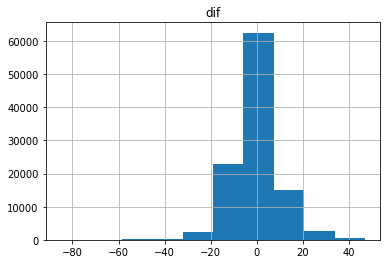

In [139]:
df_resultados.hist("dif")